<a href="https://colab.research.google.com/github/dkayikci/ML-Arch/blob/main/ClassicalMLHittite2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount drive

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/MetaHittite/stelea1500x1000pxsL2/FSL')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import the necessary libraries:

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def print_directory_structure(path, level=0):
    print('    ' * level + os.path.basename(path) + '/')
    if level < 2:  # Limit depth to avoid excessive output
        for item in os.listdir(path):
            item_path = os.path.join(path, item)
            if os.path.isdir(item_path):
                print_directory_structure(item_path, level + 1)
            else:
                print('    ' * (level + 1) + item)

folder_path = "/content/drive/MyDrive/MetaHittite/stelea1500x1000pxsL2/FSL"
print("Directory structure:")
print_directory_structure(folder_path)

Directory structure:
FSL/
    queryL2_24/
        sakca/
        aslan/
        karka/
        alaca/
    supportL2_112/
        sakca/
        alaca/
        karka/
        aslan/
    best_model_fold_3.pth
    best_model_fold_4.pth
    best_model.pth
    best_model_fold_1.pth
    best_model_fold_2.pth



SVM Results:
Training Set Performance:
Accuracy: 0.9167
Precision: 0.9237
F1 Score: 0.9160
Training Confusion Matrix:
    alaca aslan karka sakca
alaca    26     0     0     0
aslan     0    23     0     5
karka     2     2    26     0
sakca     0     0     0    24



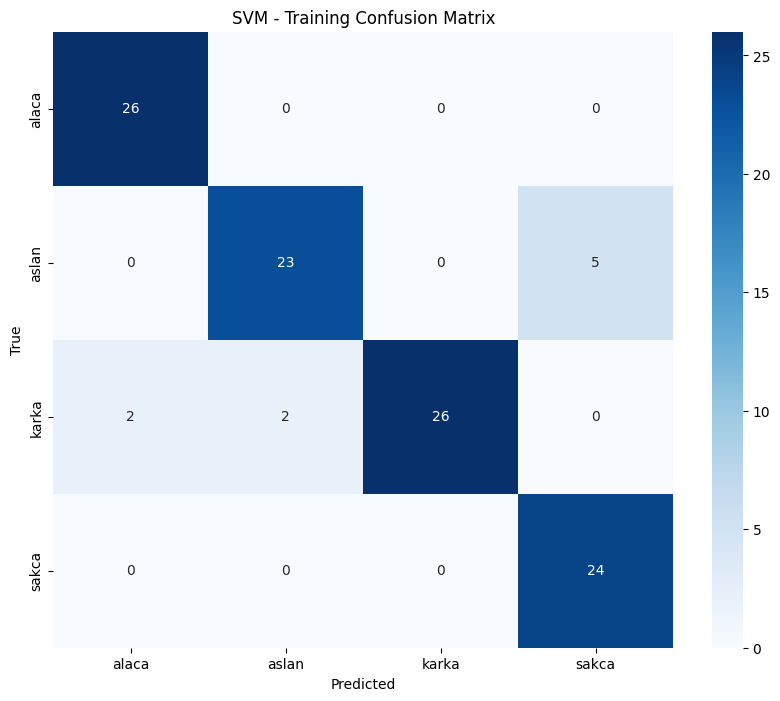

Test Set Performance:
Accuracy: 0.3929
Precision: 0.4008
F1 Score: 0.3910
Test Confusion Matrix:
    alaca aslan karka sakca
alaca     2     2     3     1
aslan     0     3     0     3
karka     2     1     1     0
sakca     2     3     0     5



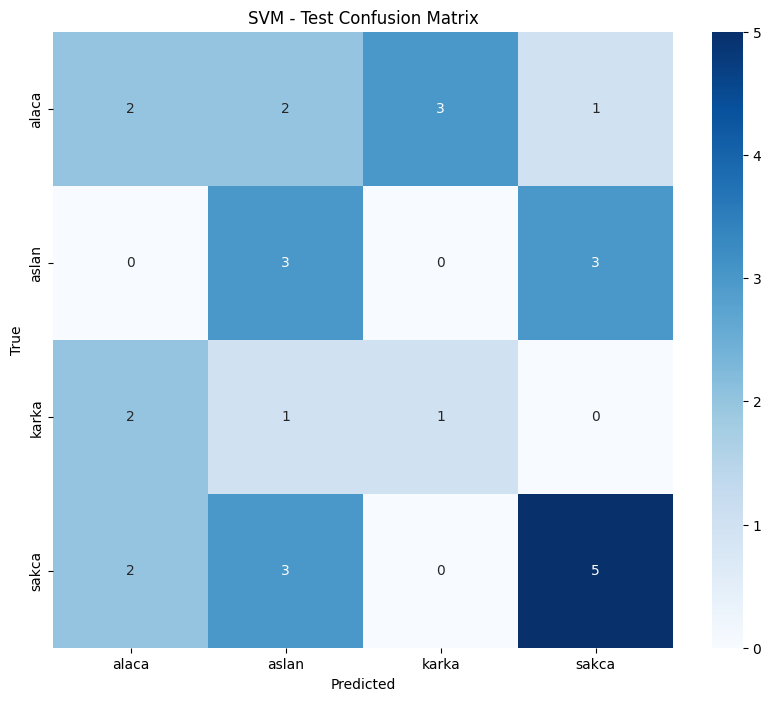

Cross-validation Scores: [0.36363636 0.36363636 0.22727273 0.38095238 0.38095238]
Average CV Score: 0.3433

KNN Results:
Training Set Performance:
Accuracy: 0.5370
Precision: 0.6401
F1 Score: 0.5430
Training Confusion Matrix:
    alaca aslan karka sakca
alaca    10    15     1     0
aslan     6    19     1     2
karka     1    15    11     3
sakca     0     6     0    18



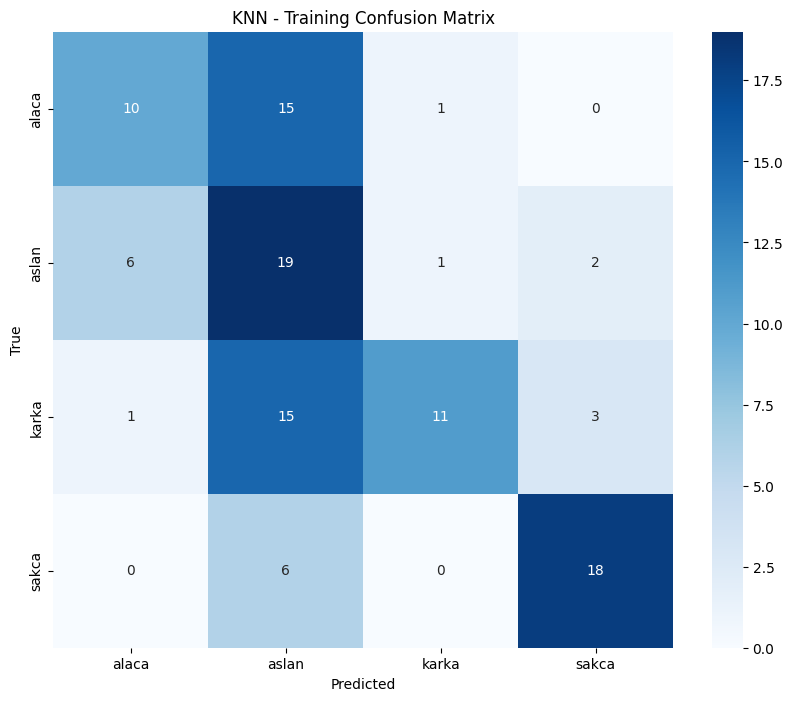

Test Set Performance:
Accuracy: 0.2500
Precision: 0.5094
F1 Score: 0.2341
Test Confusion Matrix:
    alaca aslan karka sakca
alaca     1     3     4     0
aslan     0     4     0     2
karka     0     4     0     0
sakca     0     8     0     2



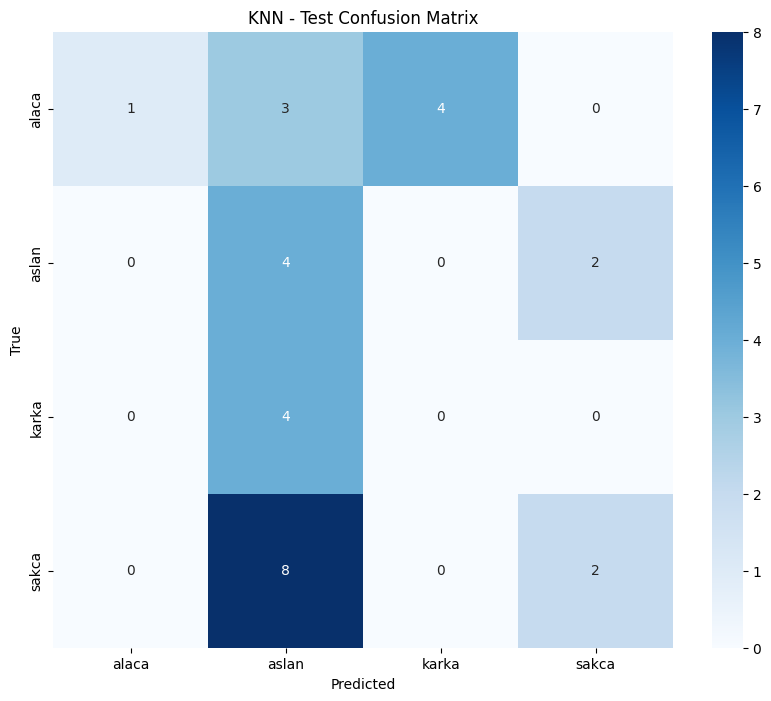

Cross-validation Scores: [0.31818182 0.31818182 0.31818182 0.19047619 0.42857143]
Average CV Score: 0.3147

Random Forest Results:
Training Set Performance:
Accuracy: 1.0000
Precision: 1.0000
F1 Score: 1.0000
Training Confusion Matrix:
    alaca aslan karka sakca
alaca    26     0     0     0
aslan     0    28     0     0
karka     0     0    30     0
sakca     0     0     0    24



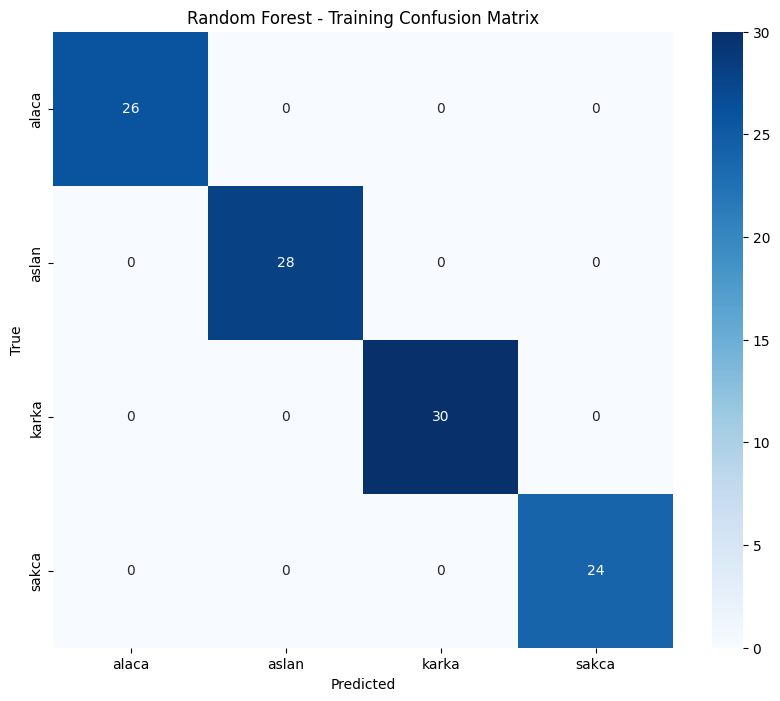

Test Set Performance:
Accuracy: 0.4286
Precision: 0.4484
F1 Score: 0.4277
Test Confusion Matrix:
    alaca aslan karka sakca
alaca     2     4     1     1
aslan     0     3     0     3
karka     1     1     2     0
sakca     2     2     1     5



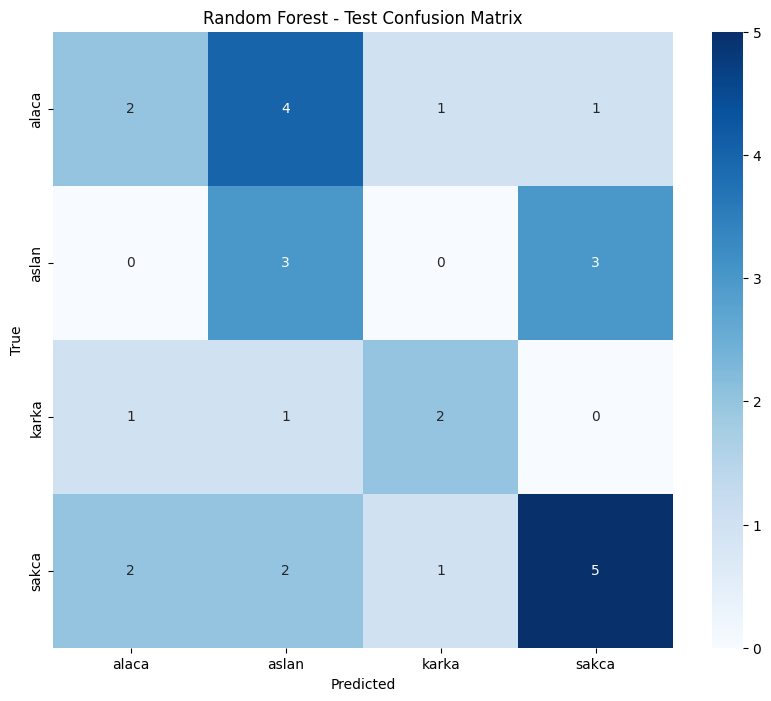

Cross-validation Scores: [0.27272727 0.40909091 0.22727273 0.33333333 0.33333333]
Average CV Score: 0.3152

Logistic Regression Results:
Training Set Performance:
Accuracy: 1.0000
Precision: 1.0000
F1 Score: 1.0000
Training Confusion Matrix:
    alaca aslan karka sakca
alaca    26     0     0     0
aslan     0    28     0     0
karka     0     0    30     0
sakca     0     0     0    24



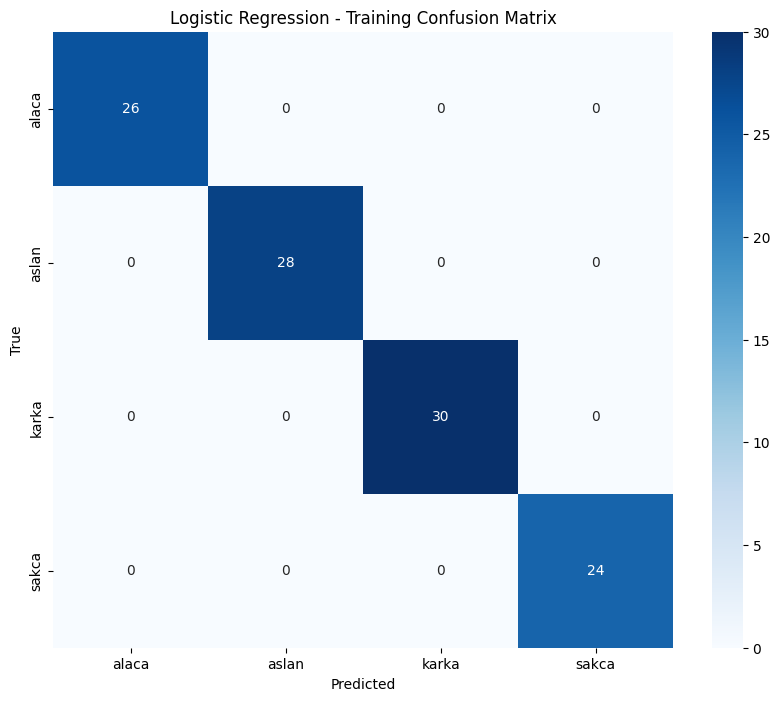

Test Set Performance:
Accuracy: 0.5000
Precision: 0.5893
F1 Score: 0.5119
Test Confusion Matrix:
    alaca aslan karka sakca
alaca     3     2     2     1
aslan     0     4     1     1
karka     0     3     1     0
sakca     1     3     0     6



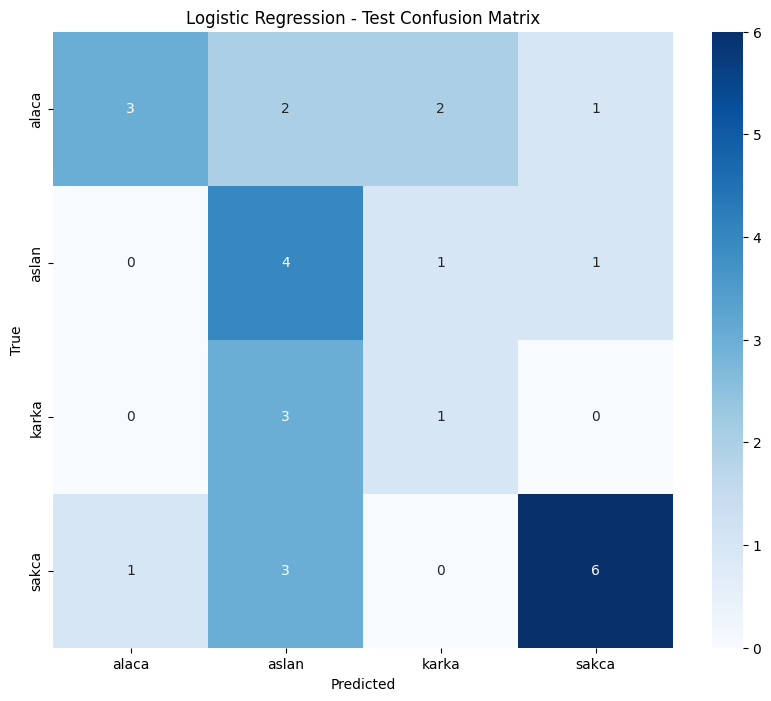

Cross-validation Scores: [0.40909091 0.5        0.40909091 0.42857143 0.23809524]
Average CV Score: 0.3970

Decision Tree Results:
Training Set Performance:
Accuracy: 1.0000
Precision: 1.0000
F1 Score: 1.0000
Training Confusion Matrix:
    alaca aslan karka sakca
alaca    26     0     0     0
aslan     0    28     0     0
karka     0     0    30     0
sakca     0     0     0    24



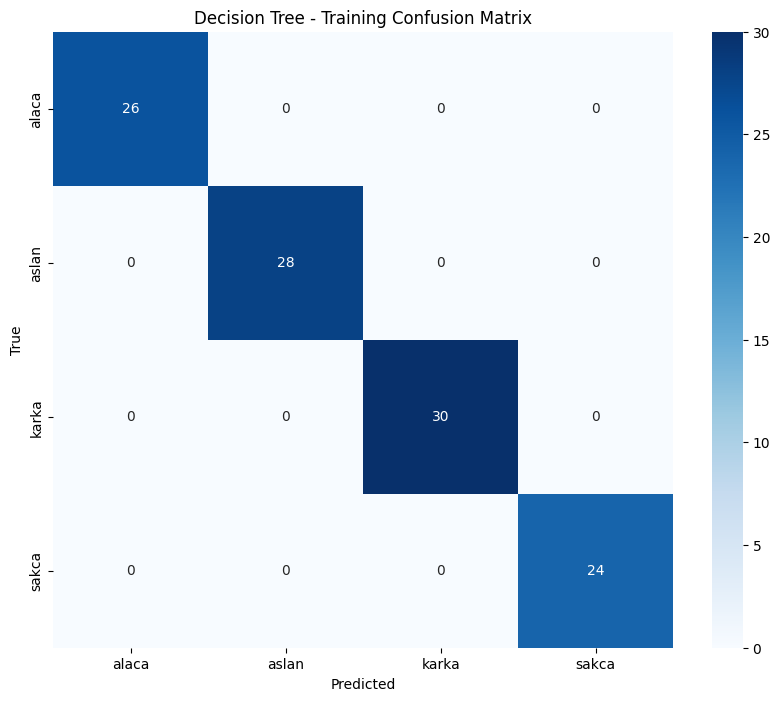

Test Set Performance:
Accuracy: 0.2500
Precision: 0.2989
F1 Score: 0.2655
Test Confusion Matrix:
    alaca aslan karka sakca
alaca     1     3     3     1
aslan     1     1     2     2
karka     2     1     1     0
sakca     2     3     1     4



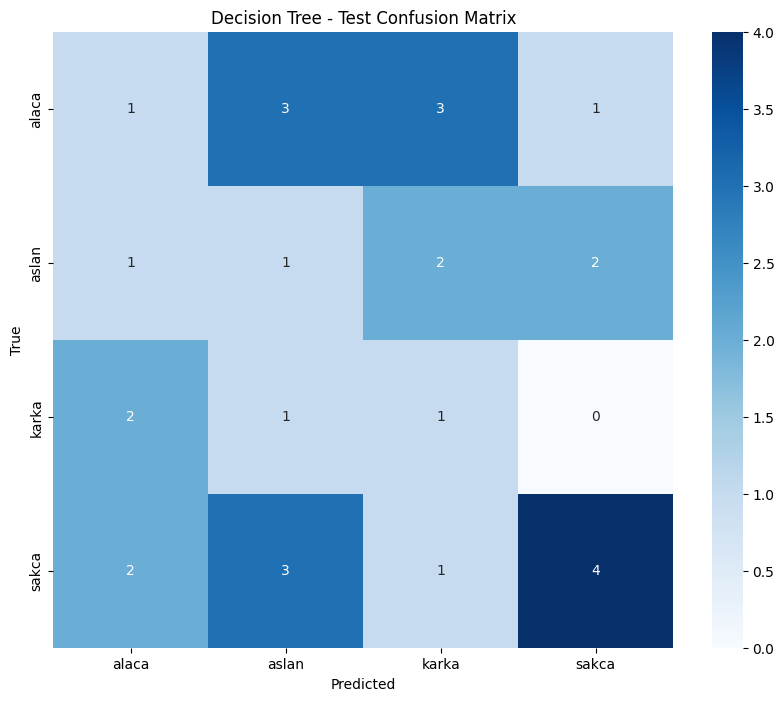

Cross-validation Scores: [0.31818182 0.40909091 0.36363636 0.23809524 0.33333333]
Average CV Score: 0.3325

Naive Bayes Results:
Training Set Performance:
Accuracy: 0.7222
Precision: 0.7616
F1 Score: 0.7194
Training Confusion Matrix:
    alaca aslan karka sakca
alaca    23     0     1     2
aslan     1    17     1     9
karka     3     4    16     7
sakca     0     1     1    22



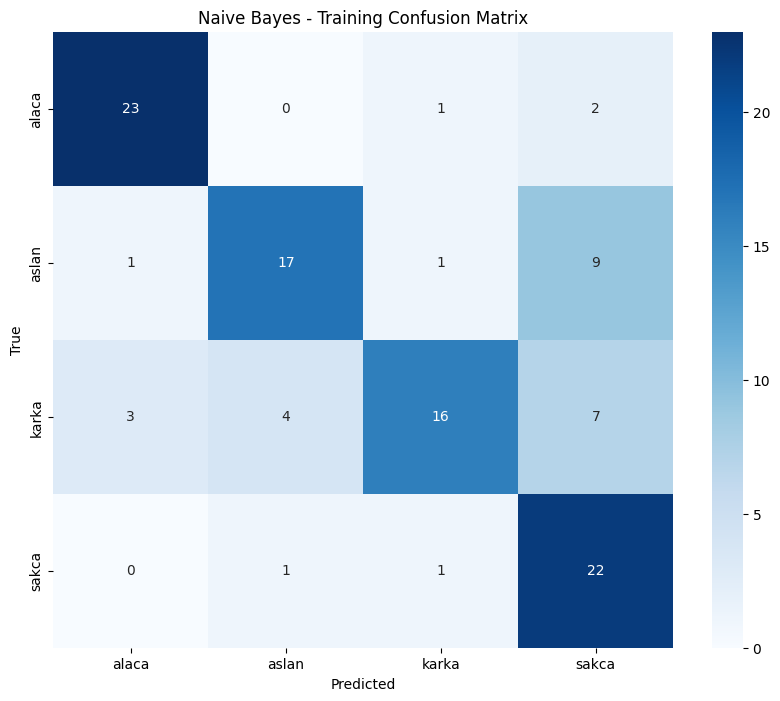

Test Set Performance:
Accuracy: 0.3571
Precision: 0.3662
F1 Score: 0.3449
Test Confusion Matrix:
    alaca aslan karka sakca
alaca     1     4     2     1
aslan     0     2     0     4
karka     1     2     1     0
sakca     1     1     2     6



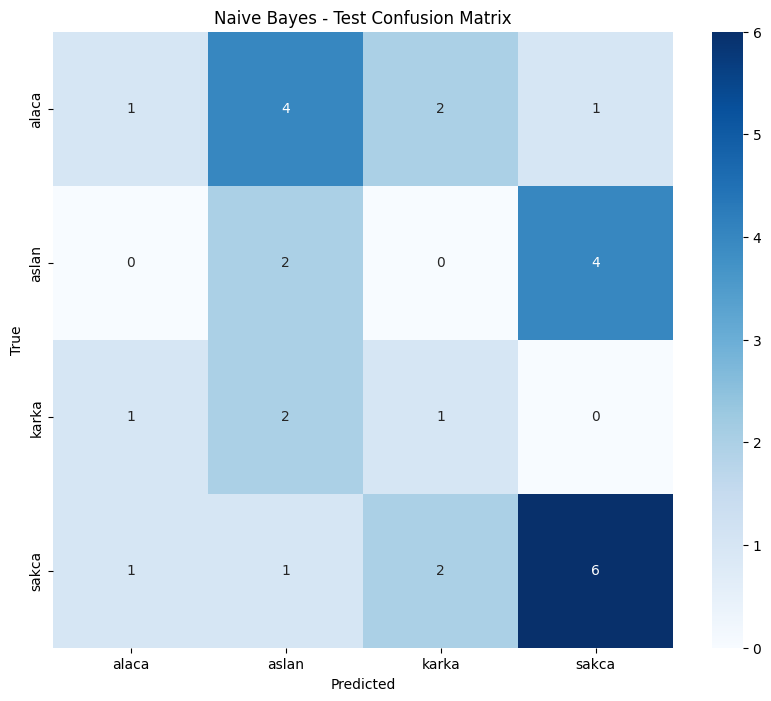

Cross-validation Scores: [0.36363636 0.31818182 0.31818182 0.42857143 0.33333333]
Average CV Score: 0.3524


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for train set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Calculate metrics for test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    # Create confusion matrices
    train_cm = confusion_matrix(y_train, y_train_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)

    return {
        'train': {
            'accuracy': train_accuracy,
            'precision': train_precision,
            'f1': train_f1,
            'cm': train_cm
        },
        'test': {
            'accuracy': test_accuracy,
            'precision': test_precision,
            'f1': test_f1,
            'cm': test_cm
        },
        'cv_scores': cv_scores
    }

def print_confusion_matrix(cm, classes, title):
    print(f"{title} Confusion Matrix:")
    print("    " + " ".join(f"{c:>5}" for c in classes))
    for i, row in enumerate(cm):
        print(f"{classes[i]:>3} " + " ".join(f"{cell:>5}" for cell in row))
    print()

def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def evaluate_and_print_results(model_name, results, classes):
    print(f"\n{model_name} Results:")

    print("Training Set Performance:")
    print(f"Accuracy: {results['train']['accuracy']:.4f}")
    print(f"Precision: {results['train']['precision']:.4f}")
    print(f"F1 Score: {results['train']['f1']:.4f}")
    print_confusion_matrix(results['train']['cm'], classes, "Training")
    plot_confusion_matrix(results['train']['cm'], classes, f"{model_name} - Training Confusion Matrix")

    print("Test Set Performance:")
    print(f"Accuracy: {results['test']['accuracy']:.4f}")
    print(f"Precision: {results['test']['precision']:.4f}")
    print(f"F1 Score: {results['test']['f1']:.4f}")
    print_confusion_matrix(results['test']['cm'], classes, "Test")
    plot_confusion_matrix(results['test']['cm'], classes, f"{model_name} - Test Confusion Matrix")

    print(f"Cross-validation Scores: {results['cv_scores']}")
    print(f"Average CV Score: {np.mean(results['cv_scores']):.4f}")

# Assuming X_train, X_test, y_train, y_test, and scaler are already defined
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    'SVM': SVC(kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(multi_class='ovr', random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each model
for model_name, model in models.items():
    results = train_and_evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    evaluate_and_print_results(model_name, results, np.unique(y))